 # MPA-MLF, Lab 7 - Convolutional Neural Network

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


0. Import libraries

In [3]:
from tensorflow import keras
from keras.models import Sequential
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
###################################
# Write your own code here #


import zipfile
import os
import pandas as pd
from PIL import Image
from keras.utils import image_dataset_from_directory


from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU
from keras.optimizers import Adamax,Adam, SGD
from keras.callbacks import EarlyStopping


###################################
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [ ]:
def formatNamesIntoNumbers(name):
  value=""
  if type(name)!=float: #To avoid NaN
    for element in name:
      if element=="0" or element=="1" or element=="2" or element=="3" or element=="4" or element=="5" or element=="6" or element=="7" or element=="8" or element=="9":
        value=value + str(element)
  return int(value)


items = os.listdir("/content/drive/MyDrive/data_projet/test/test_data_unlabeled")
formattedItems=[]

for name in items:
  formattedItems.append(formatNamesIntoNumbers(name))


print(formattedItems)




sorted_items = sorted(formattedItems)


count=0
for image in sorted_items:
  count+=1
  if count>50:
    break
  print(count)
  print(image)

In [26]:
def formatNamesIntoNumbers(name):
  value=""
  if type(name)!=float:
    for element in name:
      if element=="0" or element=="1" or element=="2" or element=="3" or element=="4" or element=="5" or element=="6" or element=="7" or element=="8" or element=="9":
        value=value + str(element)
  return int(value)



X_train=[]
train_items = os.listdir("/content/drive/MyDrive/data_projet/train/train_data_unlabeled")
formatted_format_items=[]
for name in train_items:
  formatted_format_items.append(formatNamesIntoNumbers(name))


train_sorted_items = sorted(formatted_format_items)

for image in train_sorted_items:
  image="img_"+str(image)+".png"
  path="/content/drive/MyDrive/data_projet/train/train_data_unlabeled/"+str(image)
  im=Image.open(path)
  im1=np.asarray(im)
  im.close()
  im1=im1[:,:,:3]
  X_train.append(im1)

X_train=np.asarray(X_train)


X_test=[]
test_items = os.listdir("/content/drive/MyDrive/data_projet/test/test_data_unlabeled")

formatted_format_items=[]
for name in test_items:
  formatted_format_items.append(formatNamesIntoNumbers(name))


test_sorted_items = sorted(formatted_format_items)

for image in test_sorted_items:
  image="img_"+str(image)+".png"
  path="/content/drive/MyDrive/data_projet/test/test_data_unlabeled/"+str(image)
  im=Image.open(path)
  im1=np.asarray(im)
  im.close()
  im1=im1[:,:,:3]
  X_test.append(im1)

X_test=np.asarray(X_test)




In [27]:
X_train_scaled = X_train.astype('float32') / 255.0
X_test_scaled = X_test.astype('float32') / 255.0

y_train=pd.DataFrame(pd.read_csv("/content/drive/MyDrive/data_projet/y_train.csv"))
y_train=y_train.drop("id", axis=1)

y_train_encoded = to_categorical(y_train, num_classes=4)


In [124]:
model = Sequential()
###################################

model.add(Conv2D(64,kernel_size=(3, 3), activation='linear', input_shape=(45,51,3)))
model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Conv2D(128,kernel_size=(3, 3), activation='linear',input_shape=(45,51,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256,kernel_size=(3, 3), activation='linear',input_shape=(45,51,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='sigmoid'))
model.add(Dense(256, activation='softplus'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='softplus'))
model.add(Dense(4, activation='softmax'))

###################################


#### 2.2 Compile the model

In [125]:

###################################
# Write your own code here #

optimizer = Adam(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

###################################
#For some reason I can not launch it at that point without a crash
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 43, 49, 64)        1792      
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 10, 12, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 8, 10, 128)        73856     
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 4, 5, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_40 (Conv2D)          (None, 2, 3, 256)         295168    
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 1, 1, 256)       

### 3. Training stage

#### 3.1 Model training

In [126]:
###################################
# Write your own code here #
callback = EarlyStopping(monitor='loss', patience=3)
history = model.fit(X_train_scaled, y_train_encoded, epochs=100, batch_size=200, validation_split = 0.2, callbacks=[callback])


###################################

Epoch 1/100
65/65 [==============================] - 3s 23ms/step - loss: 1.2201 - accuracy: 0.4192 - val_loss: 0.9510 - val_accuracy: 0.6589
Epoch 2/100
65/65 [==============================] - 1s 16ms/step - loss: 0.7594 - accuracy: 0.6834 - val_loss: 0.6303 - val_accuracy: 0.7223
Epoch 3/100
65/65 [==============================] - 1s 16ms/step - loss: 0.5244 - accuracy: 0.7896 - val_loss: 0.5549 - val_accuracy: 0.7668
Epoch 4/100
65/65 [==============================] - 1s 19ms/step - loss: 0.4063 - accuracy: 0.8472 - val_loss: 0.3938 - val_accuracy: 0.8428
Epoch 5/100
65/65 [==============================] - 1s 19ms/step - loss: 0.3311 - accuracy: 0.8748 - val_loss: 0.3459 - val_accuracy: 0.8635
Epoch 6/100
65/65 [==============================] - 1s 18ms/step - loss: 0.2915 - accuracy: 0.8906 - val_loss: 0.3430 - val_accuracy: 0.8696
Epoch 7/100
65/65 [==============================] - 1s 16ms/step - loss: 0.2657 - accuracy: 0.9013 - val_loss: 0.2701 - val_accuracy: 0.8984
Epoch 

#### 3.1 Model Prediction

In [111]:
predictions = model.predict(X_test_scaled)
predictions

150/150 [==============================] - 0s 2ms/step


array([[5.8883427e-09, 9.6549636e-01, 3.4503616e-02, 1.6192967e-08],
       [1.1801716e-05, 7.7152028e-05, 8.2856484e-02, 9.1705453e-01],
       [2.5034240e-07, 1.5150944e-08, 1.0849575e-05, 9.9998891e-01],
       ...,
       [1.0000000e+00, 2.0737391e-18, 8.1081088e-12, 1.6736833e-10],
       [1.0000000e+00, 2.9802099e-18, 2.0271847e-11, 1.7056426e-10],
       [4.3685478e-08, 2.8882962e-06, 9.9999702e-01, 6.0160293e-10]],
      dtype=float32)

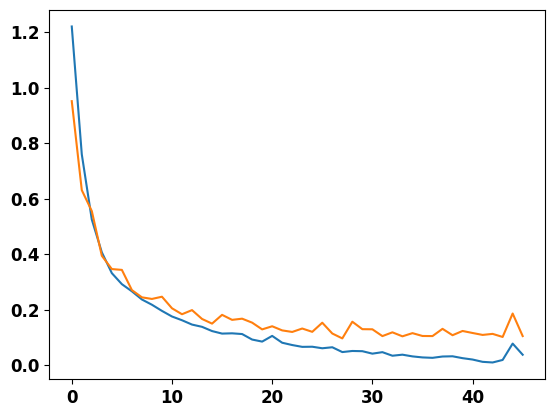

In [127]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

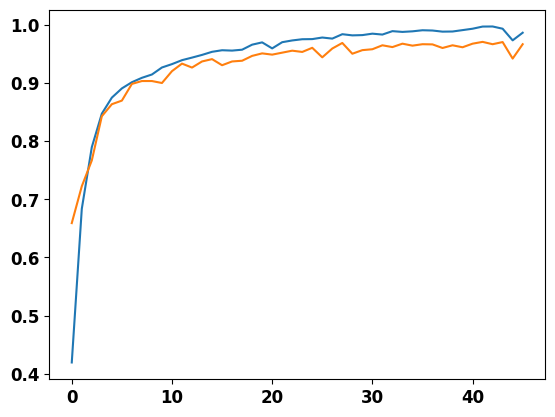

In [128]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [115]:
###################################
 #CSV Creation
id = range(len(predictions))
answers=[]
for loop in predictions:
  max=0
  count=0
  for j in range(len(loop)):
    if loop[j]>max:
      max=loop[j]
      count=j
  answers.append(count)

df = pd.DataFrame({'id': id, 'target': answers})

df.to_csv('X_test.csv', index=False)

###################################